# Perceptrón AND

Danae Sánchez Villegas 136040


In [1]:
import pandas as pd
import numpy as np
import csv
import random
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Funciones

In [16]:
def salida(x,w0,W):
    sum=0
    
    for i in range(len(x)):
        sum=sum+x[i]*W[i]
    sum=sum+w0
    if (sum>=0):
        sum=1
    else:
        sum=-1
    return sum
 
def entrenaSinReg(X,w0,W,y,n):
    
    nu=0.01
    
    for i in range(n):
        error=y[i]-salida(X[i],w0,W)
        w0=w0+nu*error
            
        for j in range(len(X[i])):
            W[j]=W[j]+nu*(error*X[i][j])
    
    return w0,W

def entrena(X,w0,W,y,n,lbd):
    
    nu=0.01
    
    for i in range(n):
        error=y[i]-salida(X[i],w0,W)
        w0=w0+nu*error
            
        for j in range(len(X[i])):
            W[j]=W[j]+nu*(error*X[i][j]-lbd*W[j])
    
    return w0,W

def errorClasificador(X,y,w0,W):
    i=0
    suma=0
    for x in X:
        modelo=salida(x,w0,W) 
        if(y[i]>=0):
            real=1
        else:
            real=-1
        if(real!=modelo):
            suma+=1
        i=i+1
    
    return suma/float(len(y)) 



#AND

# Importar Datos

In [17]:
dia = csv.excel()
df = pd.read_csv("and.csv")

In [18]:
 X_train, X_test, Y_train, Y_test = train_test_split(df[['X1','X2']],df[['Y']], train_size=0.75)


# Probar

In [42]:
W=[random.random() for i in range(2)]
w0=random.random()

In [43]:
for i in range(10000):
    w0,W=entrenaSinReg(np.asarray(X_test),w0,W,np.asarray(Y_test),len(X_test))

error=errorClasificador(np.asarray(X_test),np.asarray(Y_test),w0[0],W)


In [44]:
w0

array([ 0.00362243])

In [45]:
W

[array([ 0.62470573]), array([ 0.79840712])]

In [46]:
error


0.0

In [47]:
m=-W[0]/W[1]
b=-w0/W[1]

# Modelo

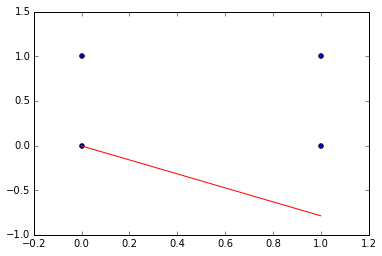

In [49]:
plt.scatter(df[['X1']],df[['X2']])
plt.plot(df[['X1']],m*(df[['X1']])+b,color='red')